In [121]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model

import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import cv2

In [2]:
dataset = pd.read_csv('dataset.csv', header=0)
dataset = dataset.values
dataset

array([['Healthy/Healthy 0.jpg', 394.2207792207793, 563.922077922078,
        723.4415584415585, 158.72727272727275, 0],
       ['Healthy/Healthy 0.jpg', 240.9740259740261, 537.2987012987013,
        437.0779220779222, 217.81818181818184, 0],
       ['Healthy/Healthy 0.jpg', 683.1818181818182, 552.2337662337662,
        1014.3506493506494, 145.74025974025977, 0],
       ['Healthy/Healthy 0.jpg', 984.4805194805195, 190.54545454545456,
        1198.766233766234, 530.1558441558442, 0],
       ['Healthy/Healthy 0.jpg', 127.98701298701306, 248.987012987013,
        278.63636363636374, 582.1038961038962, 0],
       ['Healthy/Healthy 0.jpg', 1179.935064935065, 200.93506493506496,
        1326.6883116883118, 571.0649350649351, 0],
       ['Healthy/Healthy 1.jpg', 237.09243697478996, 161.56302521008405,
        313.2829131652661, 251.19887955182077, 0],
       ['Healthy/Healthy 1.jpg', 305.71988795518206, 160.16246498599443,
        385.5518207282913, 250.35854341736697, 0],
       ['Healthy/He

In [65]:
x = []
y = []
z = []

for i in dataset:
    #print(i)
    gambar = cv2.imread(i[0])
    ukuran_asli = gambar.shape
    gambar = cv2.resize(gambar, (299,299))/255
    x.append(gambar)
    #print(gambar.shape)
    y.append([i[1]/ukuran_asli[1], i[2]/ukuran_asli[0], i[3]/ukuran_asli[1], i[4]/ukuran_asli[0]])
    z.append(i[5])

dataZ = list(zip(x,y,z))
random.shuffle(dataZ)
x,y,z = zip(*dataZ)
x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(z)

In [52]:
y.shape

(122, 4)

In [68]:
z

array([1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2,
       2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1])

In [53]:
x.shape[1:]

(299, 299, 3)

In [57]:
x.shape

(122, 299, 299, 3)

In [69]:
model = Sequential()
model.add(Conv2D(8, (3,3), input_shape=x.shape[1:], activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dense(4, activation='sigmoid'))

output1 = Sequential()
output1.add(Dense(4, activation='sigmoid'))

output2 = Sequential()
output2.add(Dense(3, activation='softmax'))


In [61]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 297, 297, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 148, 148, 8)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 16)      1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 85264)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [62]:
model.fit(x, y, batch_size=2, epochs=10)

Epoch 1/10
61/61 [==============================] - 16s 12ms/step - loss: 0.0671
Epoch 2/10
61/61 [==============================] - 1s 12ms/step - loss: 0.0388
Epoch 3/10
61/61 [==============================] - 1s 12ms/step - loss: 0.0378
Epoch 4/10
61/61 [==============================] - 1s 12ms/step - loss: 0.0363
Epoch 5/10
61/61 [==============================] - 1s 12ms/step - loss: 0.0361
Epoch 6/10
61/61 [==============================] - 1s 11ms/step - loss: 0.0362
Epoch 7/10
61/61 [==============================] - 1s 11ms/step - loss: 0.0356
Epoch 8/10
61/61 [==============================] - 1s 12ms/step - loss: 0.0359
Epoch 9/10
61/61 [==============================] - 1s 12ms/step - loss: 0.0359
Epoch 10/10
61/61 [==============================] - 1s 12ms/step - loss: 0.0354


In [79]:
class Cantik(Model):
    def __init__(self, model, output1, output2):
        super(Cantik, self).__init__()
        self.model = model
        self.output1 = output1
        self.output2 = output2
        
    def call(self, x):
        _ = self.model(x)
        posisi = self.output1(_)
        jenis = self.output2(_)
        hasil = [posisi, jenis]
        return hasil

In [100]:
cantik = Cantik(model, output1, output2)
cantik.compile(loss = ['mse', 'sparse_categorical_crossentropy'], 
               optimizer='adam', metrics=['accuracy'])

In [99]:
print(cantik.metrics_names)

['loss', 'output_1_loss', 'output_2_loss']


In [90]:
output1.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000017C29B3E670>>

In [91]:
z.shape

(122,)

In [101]:
cantik.fit(x, [y, z], batch_size=1, epochs=10)

Epoch 1/10
122/122 [==============================] - 2s 8ms/step - loss: 0.0416 - output_1_loss: 0.0407 - output_2_loss: 8.9481e-04 - output_1_accuracy: 0.5246 - output_2_accuracy: 1.0000
Epoch 2/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0420 - output_1_loss: 0.0410 - output_2_loss: 0.0010 - output_1_accuracy: 0.5082 - output_2_accuracy: 1.0000
Epoch 3/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0393 - output_1_loss: 0.0389 - output_2_loss: 4.2231e-04 - output_1_accuracy: 0.4918 - output_2_accuracy: 1.0000
Epoch 4/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0385 - output_1_loss: 0.0381 - output_2_loss: 3.6740e-04 - output_1_accuracy: 0.5164 - output_2_accuracy: 1.0000
Epoch 5/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0384 - output_1_loss: 0.0379 - output_2_loss: 4.6646e-04 - output_1_accuracy: 0.5574 - output_2_accuracy: 1.0000
Epoch 6/10
122/122 [==============================] - 1s 6m

In [139]:
import numpy as np

gambar = cv2.imread('Healthy 37.jpg')
ukuran_asli = gambar.shape
gambar = cv2.resize(gambar, (299,299))/255
gambar = np.expand_dims(gambar, axis=0)
prediction = cantik.predict(gambar)
#prediction = np.argmax(prediction,axis=1)
print(prediction)

1/1 [==============================] - 0s 17ms/step
[array([[0.46018705, 0.41096848, 0.5444461 , 0.5162959 ]], dtype=float32), array([[0.9768695 , 0.01111446, 0.01201612]], dtype=float32)]


In [141]:
ukuran_asli

(368, 612, 3)

In [137]:
x1 = int(prediction[0][0][0]*ukuran_asli[1])
y1 = int(prediction[0][0][1]*ukuran_asli[0])
x2 = int(prediction[0][0][2]*ukuran_asli[1])
y2 = int(prediction[0][0][3]*ukuran_asli[0])

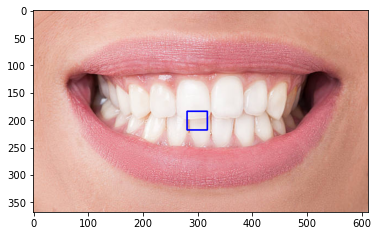

In [140]:
gambar = cv2.imread('Healthy 37.jpg')
gambar = cv2.rectangle(gambar, (x1,y1), (x2,y2), (255,0,0), 2)
plt.imshow(gambar[:,:,::-1])


In [112]:
np.argmax(prediction[1], axis=1)

array([0], dtype=int64)